# EMAIL SPAM CLASSIFICATION USING LOGISTIC REGRESSION , CNN ,NAIVE BAYES 

Application :Email is spam or not

Atul Kumar Gauatam||20105033||IITK||SMD||

In [1]:
#Importing the Library 
import numpy as np 
import pandas as pd
import string 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. LOGISTIC REGRESSION

In [10]:
# Reading the dataset 
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [11]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()
df_copy

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: email, Length: 5572, dtype: object

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: email, Length: 5572, dtype: object

In [8]:
import string
def removePunctuation(x):
    clean_emails = [x.translate(str.maketrans('','',string.punctuation)) for  i in x]
    return clean_emails
df_copy = df_copy.apply(removePunctuation)
df_copy

AttributeError: 'list' object has no attribute 'translate'

In [11]:
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)
Email_Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Email_Spam_model.fit(email_train, spam_nospam_train)
pred = Email_Spam_model.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))

Accuracy is: 0.9597989949748744


C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# 2.CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
df = pd.read_csv('C:/data/spam.csv', encoding = 'ISO-8859-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [15]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()

In [16]:
df['Spam/Not_Spam'] = df['Spam/Not_Spam'].map({'ham' : 0, 'spam' : 1})
y = df['Spam/Not_Spam'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['email'], y, test_size = 0.3)

In [18]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(X_train)
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

In [19]:
l = len(tokenizer.word_index)
print(f'{l} number of tokens found')

7456 number of tokens found


In [20]:
train_seq = pad_sequences(train_seq)
test_seq = pad_sequences(test_seq, maxlen = train_seq.shape[1])

In [24]:
def embeddings(fl1=32, fl2=32, fl3=64, dl=16, optimizer= 'RMSprop', kl = 5, layer =1 ):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    if (layer == 1):
        x = Conv1D(filters = fl1, kernel_size = kl, activation='relu')(embedded_sequences)
        x = MaxPooling1D(pool_size = kl)(x)
    elif (layer == 2):
        x = Conv1D(filters = fl1, kernel_size = kl, activation='relu')(embedded_sequences)
        x = MaxPooling1D(pool_size = kl)(x)
        x = Conv1D(filters = fl2, kernel_size = kl, activation='relu')(x)
        x = MaxPooling1D(pool_size = kl)(x)
        
    else:
        x = Conv1D(filters = fl1, kernel_size = kl, activation='relu')(embedded_sequences)
        x = MaxPooling1D(pool_size = kl)(x)
        x = Conv1D(filters = fl2, kernel_size = kl, activation='relu')(x)
        x = MaxPooling1D(pool_size = kl)(x)
        x = Conv1D(filters = fl3, kernel_size = kl, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(units = dl, activation='relu')(x)
    preds = Dense(1, activation='tanh')(x)
    model = Model(sequence_input, preds)
    model.compile(loss= 'binary_crossentropy',optimizer= optimizer,
              metrics=['acc'])
   
    return model

In [ ]:
def embedding_LSTM(fl1=16, fl2=16, fl3=16, dl=16, optimizer= 'RMSprop', kl = 5, layer =1): 
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Bidirectional(LSTM(units = fl1, return_sequences=True))(embedded_sequences)
    x = GlobalMaxPool1D()(x)
    x = Dense(units=dl, activation="relu")(x)
    x = Dropout(0.1)(x)
    preds = Dense(1, activation='tanh')(x)
    model = Model(sequence_input, preds)
    model.compile(loss= 'binary_crossentropy',
              optimizer= optimizer,
              metrics=['acc'])
    return model

In [21]:
i_p = Input(shape = (train_seq.shape[1],))
o_p = Embedding(l+1, 25)(i_p)
o_p = Conv1D(64, 3, activation = 'relu')(o_p)
o_p = MaxPooling1D(3)(o_p)
o_p = Conv1D(128, 3, activation = 'relu')(o_p)
o_p = GlobalMaxPooling1D()(o_p)
o_p = Dense(1, activation = 'sigmoid')(o_p)

model = Model(i_p,o_p)

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
r = model.fit(train_seq , y_train, validation_data = (test_seq , y_test), epochs = 10)

Epoch 1/10
122/122 [==============================] - 2s 11ms/step - loss: 0.3670 - accuracy: 0.8674 - val_loss: 0.2622 - val_accuracy: 0.8624
Epoch 2/10
122/122 [==============================] - 1s 9ms/step - loss: 0.1378 - accuracy: 0.9392 - val_loss: 0.0556 - val_accuracy: 0.9862
Epoch 3/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 4/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0554 - val_accuracy: 0.9868
Epoch 5/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0598 - val_accuracy: 0.9862
Epoch 6/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0654 - val_accuracy: 0.9868
Epoch 7/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0681 - val_accuracy: 0.9868
Epoc

In [24]:
def history(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = 'validation '+argument)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(argument)
    plt.title(argument)

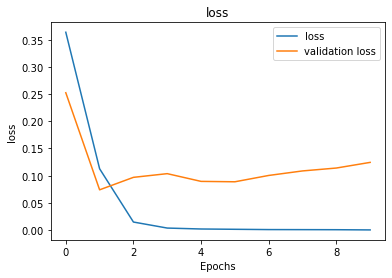

In [25]:
history(r, 'loss')

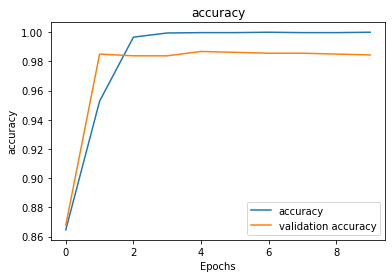

In [27]:
history_plot(r, 'accuracy')

# 3 . NAIVE BAYES CLASSIFIER

In [28]:
from sklearn.naive_bayes import MultinomialNB
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
#df.head()
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()
#df_copy
# Removing Punctuation from dataframe
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass 
    return x
df_copy = df_copy.apply(remove_punctuation)
#df_copy
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)

C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [29]:
Naive_classifier = MultinomialNB()
Naive_classifier.fit(email_train, spam_nospam_train)
pred = Naive_classifier.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))

Accuracy is: 0.9475951184493898
